<a href="https://colab.research.google.com/github/tishhaagrawal/ML_Beginner_Projects/blob/main/Placement_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
#steps
# preprocess + EDA + Feature Selection\
# Extract input and output columns
# scale the values
# Train Test Split
# Train the model
# Evaluate the model/ Model selection
# deploy the model

In [9]:
import numpy as np
import pandas as pd

In [10]:
df = pd.read_csv('/content/placement.csv')

In [11]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [12]:
df.shape

(100, 4)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [14]:
df = df.iloc[:,1:]

In [15]:
df

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


In [16]:
import matplotlib.pyplot as plt

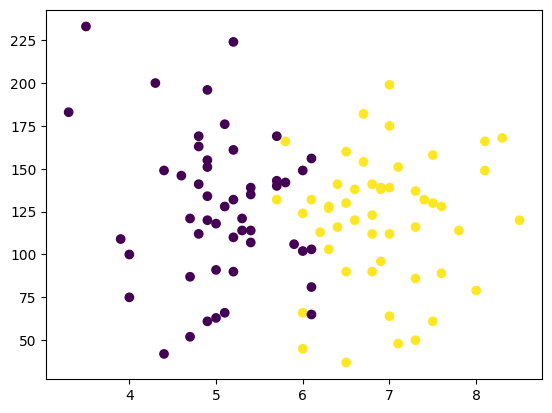

In [17]:
plt.scatter(df['cgpa'], df['iq'], c=df['placement'])

In [18]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [19]:
y

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


In [20]:
y.shape

(100,)

In [21]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [24]:
X_train


,cgpa,iq
93,6.8,112.0
44,7.5,61.0
54,6.4,141.0
53,8.3,168.0
61,7.3,137.0
...,...,...
67,5.0,118.0
97,6.7,182.0
63,6.3,128.0
88,4.4,149.0


In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler =  StandardScaler()

In [27]:
X_train = scaler.fit_transform(X_train)

In [28]:
X_test = scaler.transform(X_test)

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
clf = LogisticRegression()

In [31]:
clf.fit(X_train, y_train)

LogisticRegression()

In [32]:
y_pred = clf.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
accuracy_score(y_test,y_pred)

0.9

In [35]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

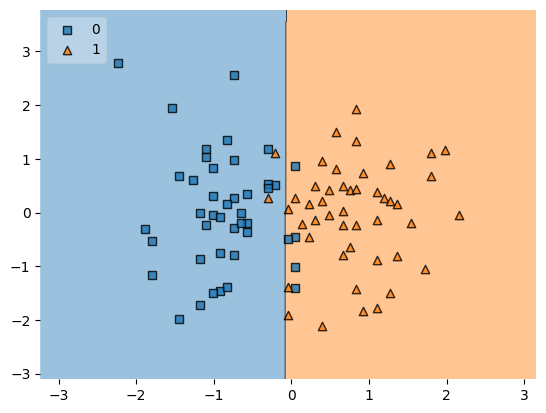

In [36]:
plot_decision_regions(X_train, y_train.values, clf = clf, legend =2)

In [37]:
import pickle

In [38]:
pickle.dump(clf,open('model.pkl', 'wb'))